# Imports

In [35]:
from pandas.core.interchange import dataframe
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Visualise

In [38]:
def plot_classes(X, y):
    y = y.reshape(-1)
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    plt.figure(figsize=(8, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], c='orange', marker='o', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Class Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()


# Part 1

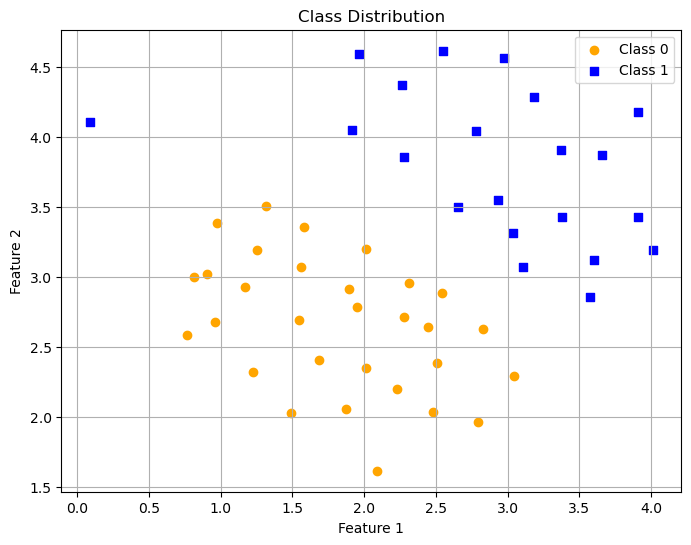

In [41]:
mat=loadmat('./Dataset/data1.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

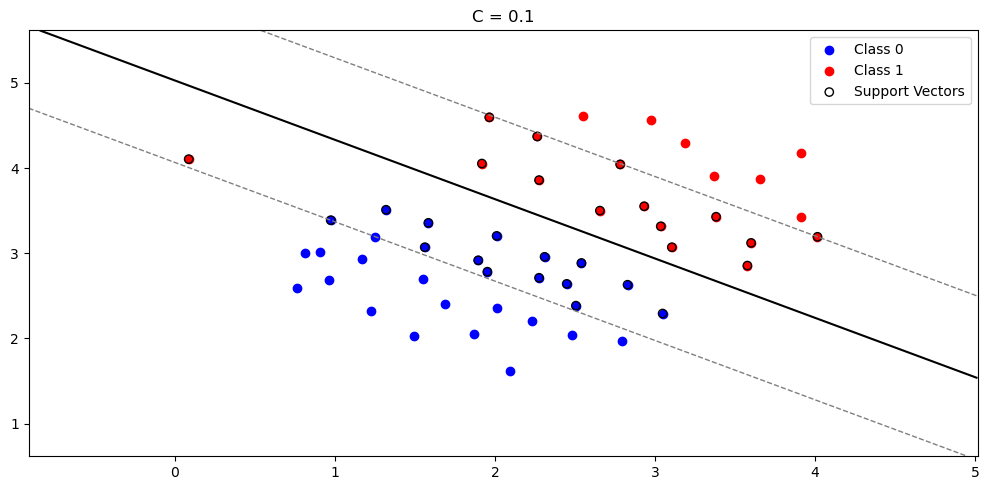

SVM Accuracy : 98.0392156862745
SVM Support Vectors count = 28


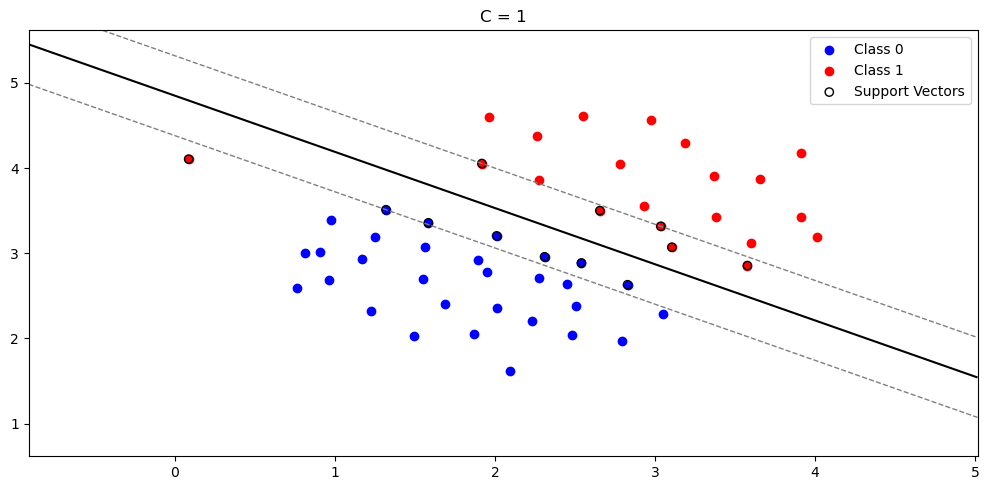

SVM Accuracy : 98.0392156862745
SVM Support Vectors count = 12


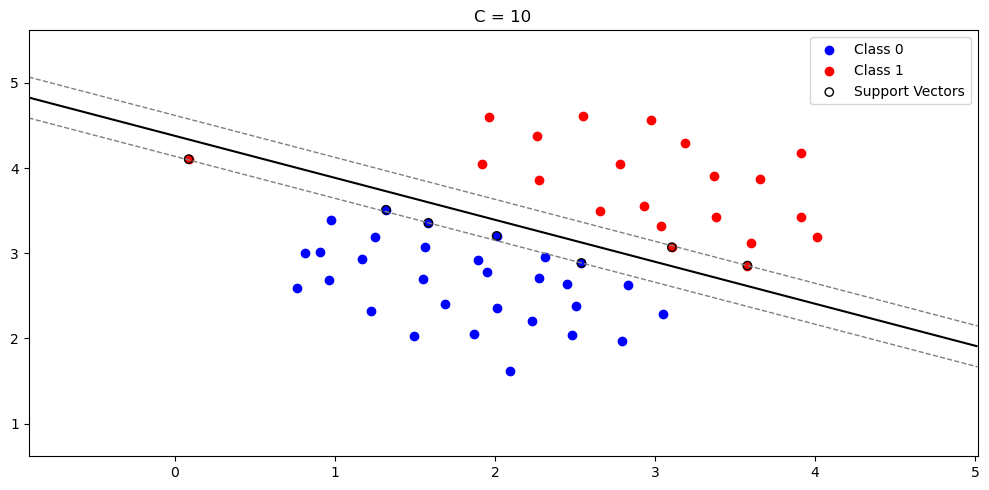

SVM Accuracy : 98.0392156862745
SVM Support Vectors count = 7


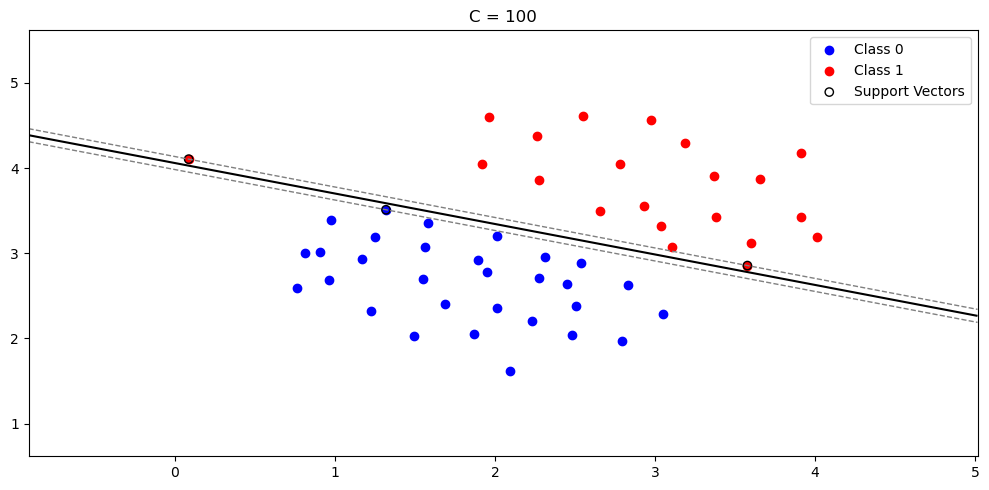

SVM Accuracy : 100.0
SVM Support Vectors count = 3


In [43]:
mat = loadmat('./Dataset/data1.mat')
X = mat['X']
y = mat['y'].astype(int).reshape(-1)
x_class_0 = X[y == 0]
x_class_1 = X[y == 1]
C_values = [0.1, 1, 10, 100]

for i in range(len(C_values)):
    model = SVC(C=C_values[i], kernel='linear')
    model.fit(X, y)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x_class_0[:,0], x_class_0[:,1] , color='blue', label='Class 0')
    plt.scatter(x_class_1[:,0], x_class_1[:,1] , color='red', label='Class 1')
    
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], facecolors='none', edgecolors='black' , label="Support Vectors")
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, colors=['gray', 'black', 'gray'], levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=[1, 1.5, 1])
    
    plt.title(f"C = {C_values[i]}")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.tight_layout() 
    plt.legend()
    plt.show()
    
    acc_svm = accuracy_score(y, model.predict(X))
    print(f"SVM Accuracy : {acc_svm*100}")
    print(f"SVM Support Vectors count = {len(model.support_)}")


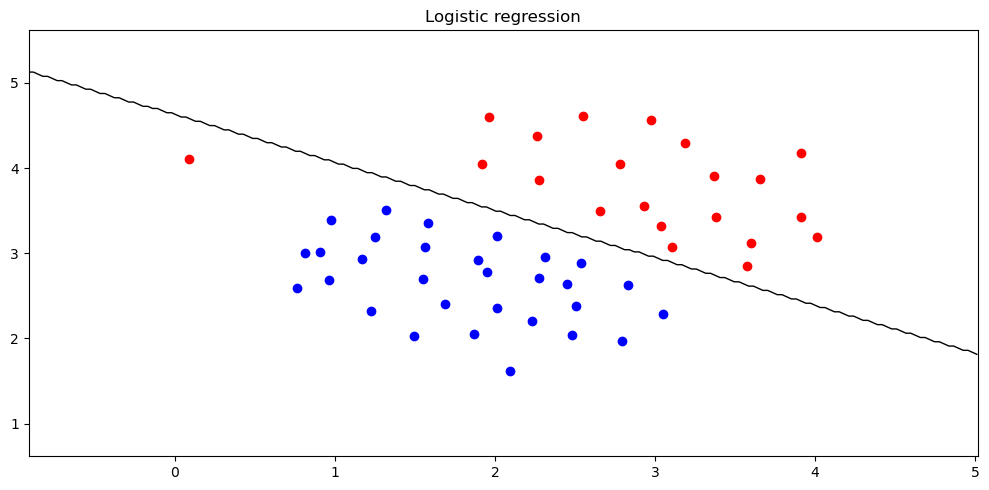

Logistic regression accuracy: 98.0392156862745


In [44]:
from sklearn.linear_model import LogisticRegression

data = loadmat('./Dataset/data1.mat')
X = data['X']
y = data['y'].astype(int).reshape(-1)
x_class_0 = X[y == 0]
x_class_1 = X[y == 1]

log_reg = LogisticRegression()
log_reg.fit(X, y)

plt.figure(figsize=(10, 5))
plt.title("Logistic regression")
plt.scatter(x_class_0[:,0], x_class_0[:,1] , color='blue', label='Class 0')
plt.scatter(x_class_1[:,0], x_class_1[:,1] , color='red', label='Class 1')

x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

XX, YY = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z_log = log_reg.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, Z_log, levels=[0.5], colors='black', linewidths = 1)

plt.tight_layout()
plt.show()
y_pred_log = log_reg.predict(X)
accuracy_log = accuracy_score(y, y_pred_log)
print(f"Logistic regression accuracy: {accuracy_log * 100}")


# Part 2

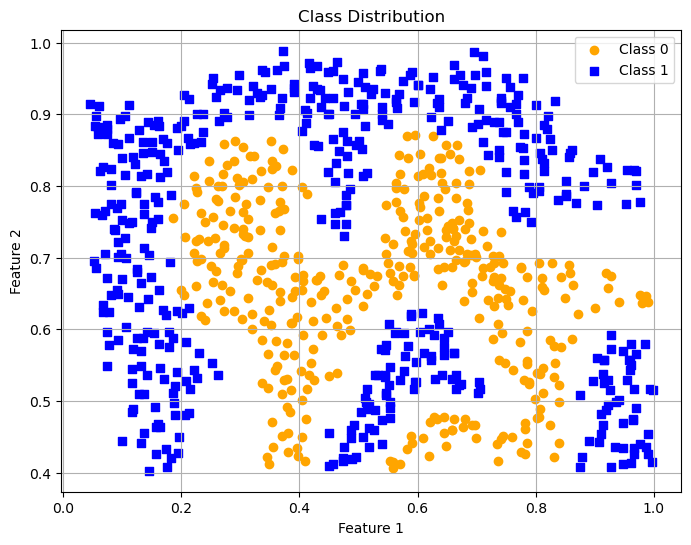

In [50]:
mat=loadmat('./Dataset/data2.mat')

X=mat['X']
y=mat['y'].astype(int).reshape(-1)
x_class_0 = X[y == 0]
x_class_1 = X[y == 1]
plot_classes(X,y)

## Linear Kernel

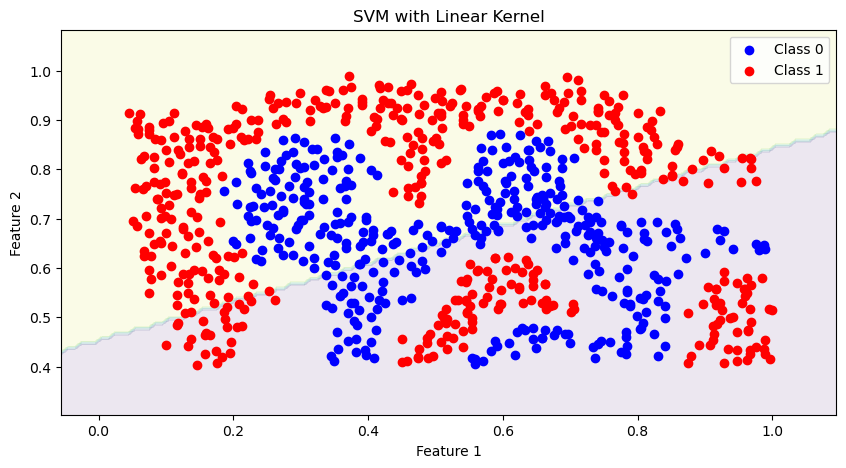

Train accuracy with Linear Kernel: 0.57
Test accuracy with Linear Kernel: 0.60


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, Z, alpha=0.1)
    plt.scatter(x_class_0[:,0], x_class_0[:,1] , color='blue', label='Class 0')
    plt.scatter(x_class_1[:,0], x_class_1[:,1] , color='red', label='Class 1')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(linear_svm, X, y, title="SVM with Linear Kernel")

y_train_linear = linear_svm.predict(X_train)
y_test_linear = linear_svm.predict(X_test)

linear_train_accuracy = accuracy_score(y_train, y_train_linear)
linear_test_accuracy = accuracy_score(y_test, y_test_linear)

print(f"Train accuracy with Linear Kernel: {linear_train_accuracy:.2f}")
print(f"Test accuracy with Linear Kernel: {linear_test_accuracy:.2f}")


##  Polynomial Kernel

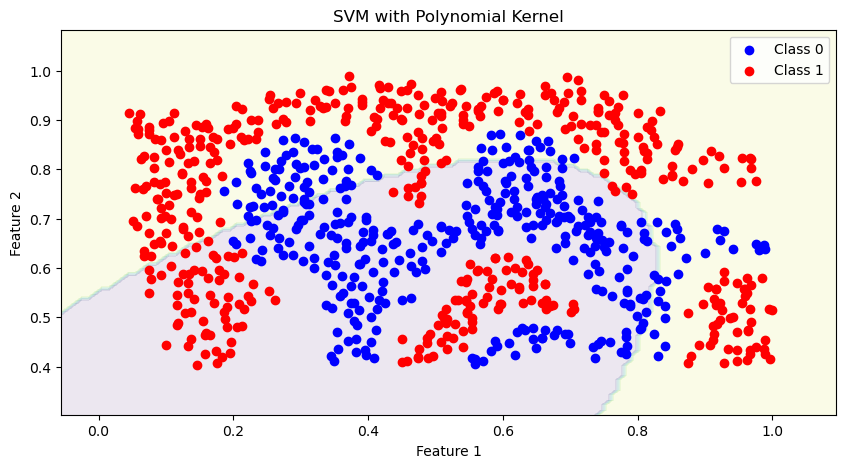

Train accuracy with Polynomial Kernel: 0.70
Test accuracy with Polynomial Kernel: 0.76


In [63]:
poly_svm = SVC(kernel='poly', degree=2)
poly_svm.fit(X_train, y_train)

plot_decision_boundary(poly_svm, X, y, title="SVM with Polynomial Kernel")


y_train_poly = poly_svm.predict(X_train)
y_test_poly = poly_svm.predict(X_test)

poly_train_accuracy = accuracy_score(y_train, y_train_poly)
poly_test_accuracy = accuracy_score(y_test, y_test_poly)

print(f"Train accuracy with Polynomial Kernel: {poly_train_accuracy:.2f}")
print(f"Test accuracy with Polynomial Kernel: {poly_test_accuracy:.2f}")

## RBF Kernel

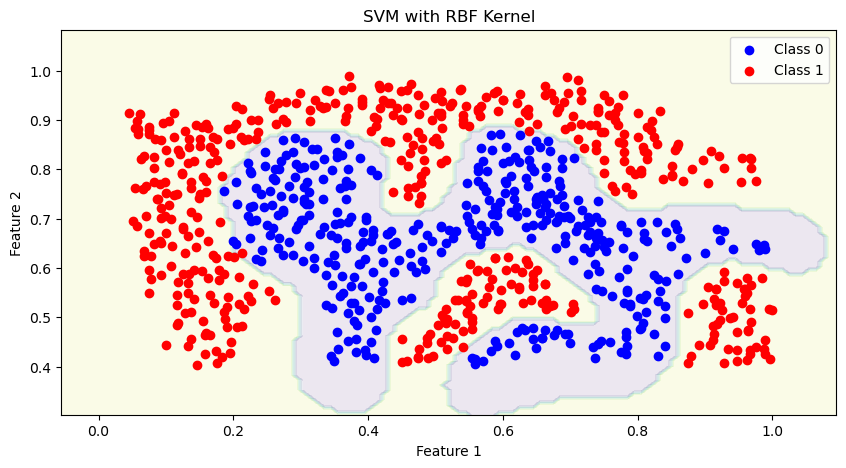

Train accuracy with Rbf Kernel: 1.00
Best parameters: C=11 , gamma=180
Test accuracy with Rbf Kernel: 0.99


In [79]:
C_values = np.arange(1,200,5).tolist()
gamma_values = np.arange(0,200,5).tolist()

best_score = 0
best_model = None
for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf' , C=C, gamma=gamma)
        model.fit(X_train, y_train)
        score = model.score(X_train, y_train)
        if score > best_score:
            best_score = score
            best_model = model

rbf_svm = best_model
rbf_svm.fit(X_train, y_train)

plot_decision_boundary(rbf_svm, X, y, title="SVM with RBF Kernel")

y_train_rbf = rbf_svm.predict(X_train)
y_test_rbf = rbf_svm.predict(X_test)

rbf_train_accuracy = accuracy_score(y_train, y_train_rbf)
rbf_test_accuracy = accuracy_score(y_test, y_test_rbf)

print(f"Train accuracy with Rbf Kernel: {rbf_train_accuracy:.2f}")
print(f"Best parameters: C={rbf_svm.C} , gamma={rbf_svm.gamma}")
print(f"Test accuracy with Rbf Kernel: {rbf_test_accuracy:.2f}")

# Part 3

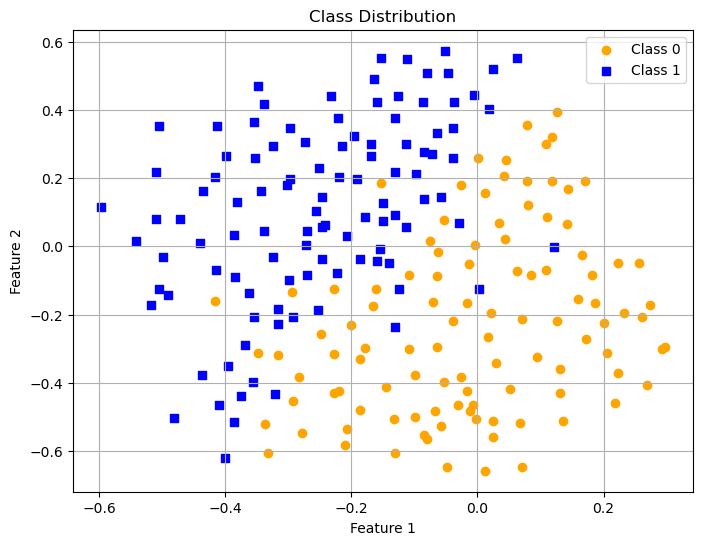

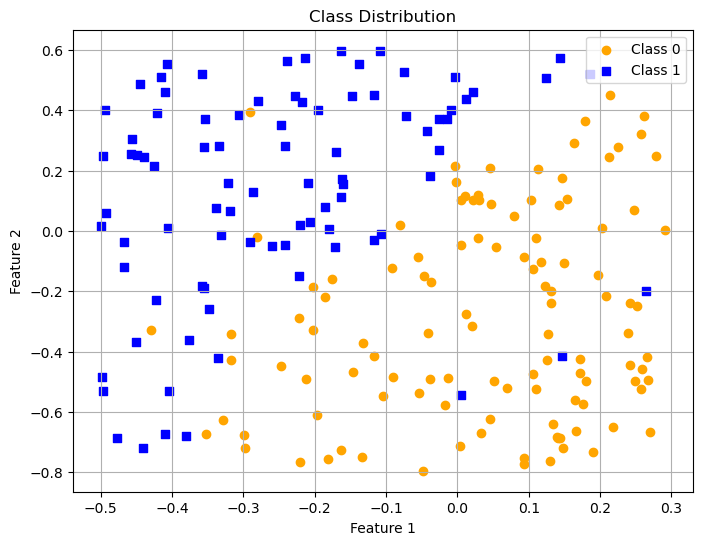

In [82]:
mat=loadmat('./Dataset/data3.mat')

X=mat['X']
y=mat['y'].astype(int).reshape(-1)

Xval=mat['Xval']
yval=mat['yval'].astype(int).reshape(-1)
plot_classes(X,y)
plot_classes(Xval,yval)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Standardize the features for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Xval_scaled = scaler.transform(Xval)

param_grid = {
    'C': np.arange(1, 20, 1),
    'gamma': ('scale', 'auto'),
    'coef0' : np.arange(0.1,10,0.5),
    'degree' : np.arange(2,10,1)
}

svm = SVC(kernel = 'rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y.ravel())

best_svm = grid_search.best_estimator_

yval_pred = best_svm.predict(Xval_scaled)
validation_accuracy = accuracy_score(yval, yval_pred)

print(f"Best Parameters : {grid_search.best_params_}")
print(f"The validation accuracy {validation_accuracy}")




Best Parameters : {'C': 14, 'coef0': 0.1, 'degree': 2, 'gamma': 'scale'}
The validation accuracy 0.955
